<a href="https://colab.research.google.com/github/Elizav555/Data_Mining/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import OPTICS
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
data = pd.read_csv('audi.csv')
data = data.dropna() #drop any null values
data.head(10)

FileNotFoundError: ignored

In [ ]:
data = data.drop(['model','transmission','fuelType'], axis=1) #leave only numeric data
#data = data.drop(['tax','mpg','engineSize','year'],axis =1) #leave only price and mileage columns
#Normalize data
data_values = pd.DataFrame(data).values
norm_data = (data_values - data_values.mean(axis=0)) / data_values.std(axis=0)
print(norm_data[0:5])

[[-0.04644979 -0.88752136 -0.3868356   0.35714729  0.35755001 -0.88021837]
 [-0.50783377 -0.54605815  0.48398914 -1.57832278  1.03713001  0.11492465]
 [-0.50783377 -1.01557006  0.21778089 -1.42944047  0.35755001 -0.88021837]
 [-0.04644979 -0.52044841  0.0478535   0.28270613  1.2765275   0.11492465]
 [ 0.87631817 -0.47776551 -0.97128544  0.28270613 -0.09035499 -1.54364705]]


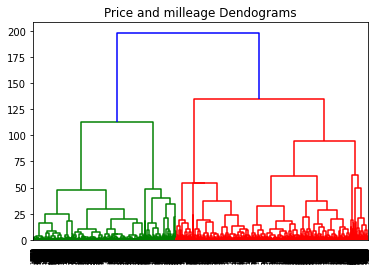

In [ ]:
#data = data.drop(['tax','mpg','engineSize','year'],axis =1) #leave only price and mileage columns
plt.title("Price and milleage Dendograms")
dend = shc.dendrogram(shc.linkage(norm_data, method='ward'))
plt.show()

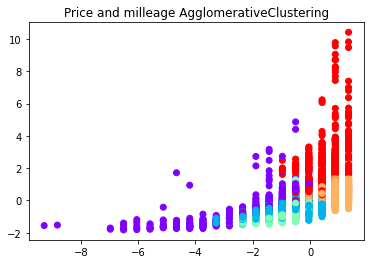

In [ ]:

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(norm_data)
plt.title("Price and milleage AgglomerativeClustering")
plt.scatter(norm_data[:,0], norm_data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

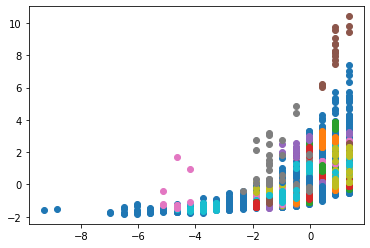

In [ ]:
model = OPTICS(eps=0.8, min_samples=10)
yhat = model.fit_predict(norm_data)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(norm_data[row_ix, 0], norm_data[row_ix, 1])
# show the plot
plt.show()

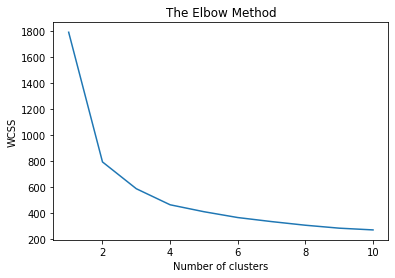

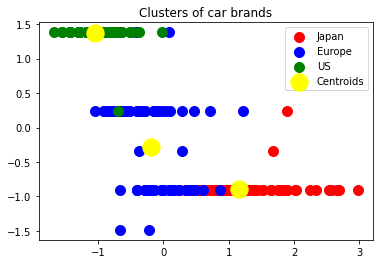

In [28]:
dataset = pd.read_csv('cars.csv')
dataset[' cubicinches'] = pd.to_numeric(dataset[' cubicinches'],errors="coerce")
dataset[' weightlbs'] = pd.to_numeric(dataset[' weightlbs'],errors="coerce")
dataset = dataset.dropna()
dataset_numeric = dataset.drop([' brand'], axis=1) #leave only numeric data
#Normalize data
dataset_values = pd.DataFrame(dataset_numeric).values
norm_dataset = (dataset_values - dataset_values.mean(axis=0)) / dataset_values.std(axis=0)
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(norm_dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(norm_dataset)

norm_dataset = np.asmatrix(norm_dataset)
X = np.array(norm_dataset)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='Japan')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Europe')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='US')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

In [29]:
dataset.insert(0,"Cluster",y_kmeans)
dataset.head(20)

,Cluster,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,2,14.0,8,350.0,165,4209.0,12,1972,US.
1,0,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,2,17.0,8,302.0,140,3449.0,11,1971,US.
3,2,15.0,8,400.0,150,3761.0,10,1971,US.
4,0,30.5,4,98.0,63,2051.0,17,1978,US.
5,2,23.0,8,350.0,125,3900.0,17,1980,US.
6,2,13.0,8,351.0,158,4363.0,13,1974,US.
7,2,14.0,8,440.0,215,4312.0,9,1971,US.
8,1,25.4,5,183.0,77,3530.0,20,1980,Europe.
9,0,37.7,4,89.0,62,2050.0,17,1982,Japan.


In [30]:
dictionary = {' Europe.': 1, ' US.': 2, ' Japan.':0}
dataset[' brand']=dataset[' brand'].map(dictionary)
dataset.head(20)
i=0
for index,row in dataset.iterrows():
  if row[' brand']!=row['Cluster']:
    i+=1
print(i)
print(dataset.shape[0])
print("Percent of similarity:", i/dataset.shape[0]*100 ,"%")

120
256
Percent of similarity: 46.875 %
